In [1]:
%run talktools.py

<img src="http://dask.readthedocs.io/en/latest/_images/dask_horizontal.svg"
     align="right"
     width="30%"
     alt="Dask logo">
     
# Dask 

Dask is a parallelization library for Python that works on your laptop all the way to cluster-scale (ie. distributed multi-node)

Main focus on creating distributed array-like abstraction: Numpy- and Pandas-like behavior.

Stack:

- Array, bag, dataframe, delayed
- Graph spec
- Scheduler

Let's you focus on algorithms and not scheduling.

Tutorial: https://github.com/dask/dask-tutorial

See also some amazing new lectures/tutorials:

https://www.youtube.com/watch?v=5Md_sSsN51k&list=PLYx7XA2nY5Gf37zYZMw6OqGFRPjB1jCy6&index=17

and a shorter talk by Matt on Dask:

https://www.youtube.com/watch?v=PAGjm4BMKlk&list=PLYx7XA2nY5Gf37zYZMw6OqGFRPjB1jCy6&index=16

In [ ]:
!brew install graphviz ## on a mac
#!apt-get install graphviz ## on linux
!pip install graphviz ## dont do this with conda, installs a Python 2 package...

## Dask Arrays

Distributed notion of an array. `Dask.array` translates your array operations into a graph of inter-related tasks with data dependencies between them. Dask then executes this graph in parallel with multiple threads. We'll discuss more about this in the next section.

Manipulate `dask.array` object as you would a numpy array

In [2]:
import dask.array as da
x = da.linspace(1,10,1000000,chunks=(1000,))

In [3]:
x.shape

(1000000,)

In [4]:
x.sum()

dask.array<sum-agg..., shape=(), dtype=None, chunksize=()>

In [5]:
_.compute()

5500000.0000000177

In [6]:
import numpy as np
import dask.array as da

x = da.random.normal(10, 0.1, size=(20000, 20000),   # 400 million element array 
                              chunks=(1000, 1000))   # Cut into 1000x1000 sized chunks
y = x.mean(axis=0)[::100]                            # Perform NumPy-style operations

In [7]:
x.nbytes / 1e9  # Gigabytes of the input processed lazily

3.2000000000000002

In [8]:
%%time
y.compute()     # Time to compute the result

CPU times: user 23.1 s, sys: 1.55 s, total: 24.7 s
Wall time: 6.82 s


array([ 10.00021022,  10.00028867,  10.00074818,  10.00093705,
        10.00036901,   9.99967152,   9.99958951,   9.99917383,
        10.00065235,  10.00169396,   9.99921973,   9.998972  ,
        10.00033803,  10.00006431,  10.00068904,  10.00187796,
         9.9994827 ,  10.00047726,  10.00126315,   9.9997762 ,
        10.00018203,  10.00023499,   9.99898503,   9.99971198,
        10.0005381 ,   9.99876205,   9.99824106,  10.00018167,
         9.99943324,   9.99923393,   9.99982348,   9.99954751,
         9.99916772,   9.99954004,   9.9996725 ,  10.0004043 ,
         9.99963845,  10.00006101,   9.99954357,   9.99961294,
        10.00259112,   9.99994107,   9.99981472,   9.99852549,
        10.00074262,   9.99974674,   9.99945421,   9.99951413,
        10.00023698,   9.99999354,   9.99958713,   9.99989314,
         9.9987494 ,   9.99857302,  10.00056401,  10.00052574,
         9.99924812,  10.00086673,   9.99961168,   9.99969294,
        10.00004176,   9.99992218,  10.00035987,  10.00

In [9]:
import numpy as np

In [10]:
%%time 
x = np.random.normal(10, 0.1, size=(20000, 20000)) 
y = x.mean(axis=0)[::100] 
y

CPU times: user 17.5 s, sys: 2.92 s, total: 20.4 s
Wall time: 21.7 s


In [11]:
%%time
x = da.random.normal(10, 0.1, size=(20000, 20000), chunks=(1000, 1000))
y = x.mean(axis=0)[::100] 
y.compute()

CPU times: user 23.2 s, sys: 1.82 s, total: 25 s
Wall time: 7.09 s


## Dask Dataframes

meant to mimick most of pandas dataframes, but now these dataframes can be out of core.

In [12]:
!ls -lah uber-raw-data-sep14.csv

-rw-r--r--  1 Kamilobu  staff    45M Sep  9 15:21 uber-raw-data-sep14.csv


In [15]:
%%time
import pandas as pd
df = pd.read_csv("uber-raw-data-sep14.csv")

CPU times: user 652 ms, sys: 87.2 ms, total: 739 ms
Wall time: 750 ms


In [16]:
%%time
import dask.dataframe as dd
df = dd.read_csv("uber-raw-data-sep14.csv")

CParserError: Error tokenizing data. C error: EOF inside string starting at line 5622

Some of the reading in is delayed, but we can still inspect the data.

In [17]:
df.head()

,Date/Time,Lat,Lon,Base
0,9/1/2014 0:01:00,40.2201,-74.0021,B02512
1,9/1/2014 0:01:00,40.7500,-74.0027,B02512
2,9/1/2014 0:03:00,40.7559,-73.9864,B02512
3,9/1/2014 0:06:00,40.7450,-73.9889,B02512
4,9/1/2014 0:11:00,40.8145,-73.9444,B02512


Other operations are delayed until you compute them:

In [18]:
df.describe()

,Lat,Lon
count,1.028136e+06,1.028136e+06
mean,4.073922e+01,-7.397182e+01
std,4.082861e-02,5.831413e-02
min,3.998970e+01,-7.477360e+01
25%,4.072040e+01,-7.399620e+01
50%,4.074180e+01,-7.398310e+01
75%,4.076120e+01,-7.396280e+01
max,4.134760e+01,-7.271630e+01


In [19]:
df.describe().compute()

AttributeError: 'DataFrame' object has no attribute 'compute'

In [ ]:
df.describe()['Lat'].compute()

`dask.delayed` (a la joblib):
 
   - `delayed(function)(*args, **kwargs)` -> lazy function that hasn't yet been evaluated
   - `delated(data)` -> lazy object that pretends to be your data
 
 See the excellent talk at SciPy 2016: https://www.youtube.com/watch?v=PAGjm4BMKlk&list=PLYx7XA2nY5Gf37zYZMw6OqGFRPjB1jCy6

In [22]:
# get a local Exector
from distributed import Executor
Executor(set_as_default=True)

<Executor: scheduler="127.0.0.1:8786" processes=4 cores=4>

In [23]:
import random
from dask import delayed, visualize
from time import sleep

@delayed(pure=True)
def add(a,b):
    sleep(random.random())
    return a+b

@delayed(pure=True)
def mul(a,b):
    sleep(random.random())
    return a*b

@delayed(pure=True)
def inc(a):
    sleep(random.random())
    return a + 1

In [24]:
x = add(1,2)
x

Delayed('add-a57add2f9f04f772e32989d220e3d4cd')

In [25]:
x.compute()

3

In [26]:
a = inc(1)
b = mul(1,2)
c = add(a,b)
c

Delayed('add-2415c778a835570cf0bb7f9af5576501')

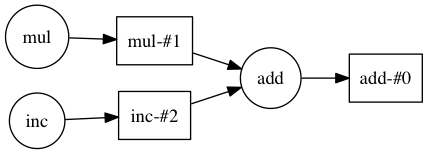

In [27]:
c.visualize(rankdir="LR")

In [28]:
c.compute()

4

### Loops

In [29]:
results = []
for x in range(4):
    a = inc(1)
    b = mul(1,x)
    c = add(a,b)
    results.append(c)

total = delayed(sum,pure=True)(results)
total

Delayed('sum-5563f86238ae4c1b05d68e95950ab29a')

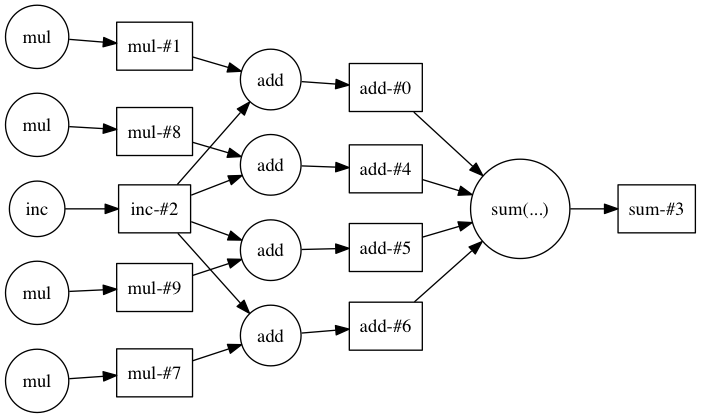

In [30]:
total.visualize(rankdir="LR")

`pure=True`: finds nested shared expressions deep in code that dont need to be recomputed. Eg. `inc(1)` here is the same so it only gets called once. A pure function should have no side-effects.

In [31]:
total.compute()

14

In [32]:
results = []
for y in range(2,10,2):
    for x in range(4):
        a = inc(1)
        b = mul(y,x)
        c = add(a,b)
        results.append(c)

total = delayed(sum,pure=True)(results)
total

Delayed('sum-e1e9e0c1cc0df9c5177e6e572cb598af')

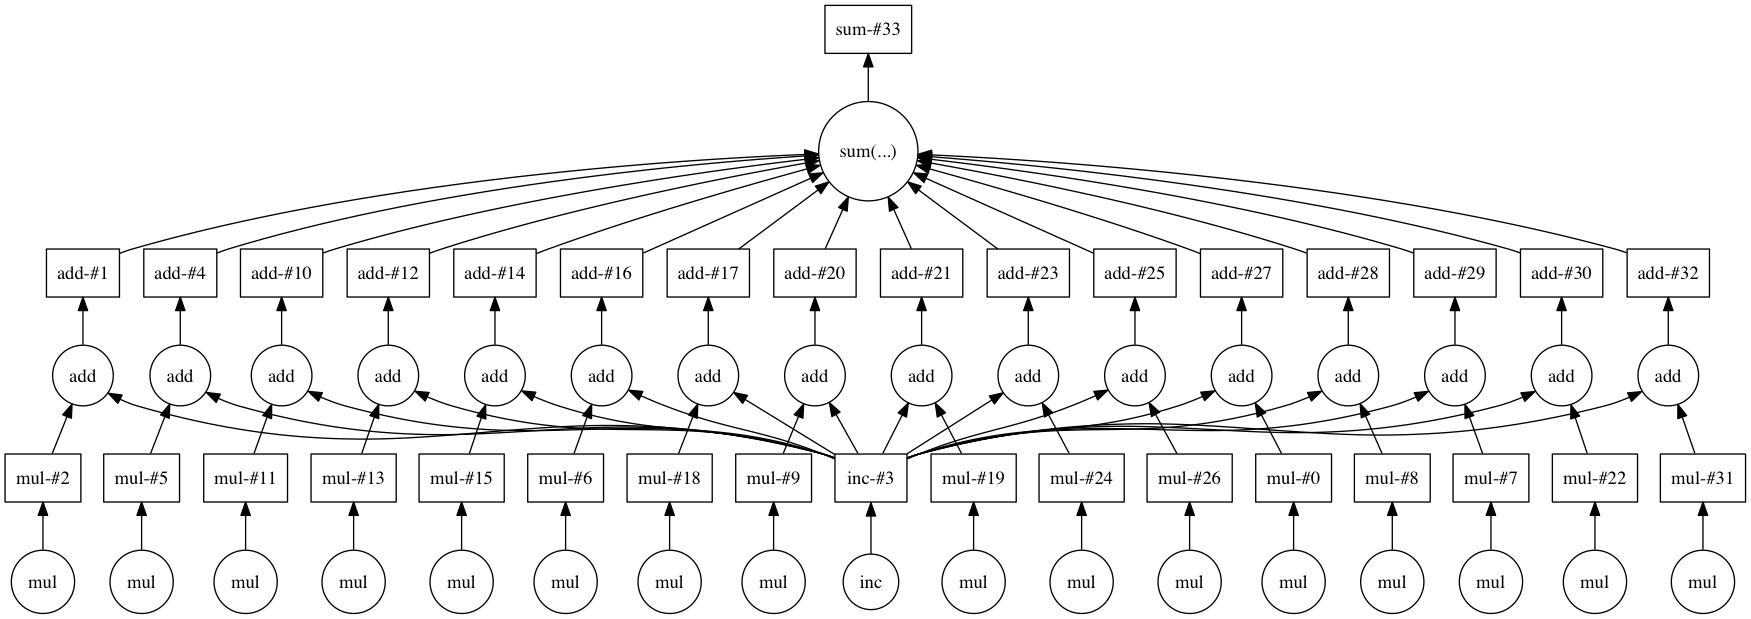

In [33]:
total.visualize()

In [34]:
total.compute()

152

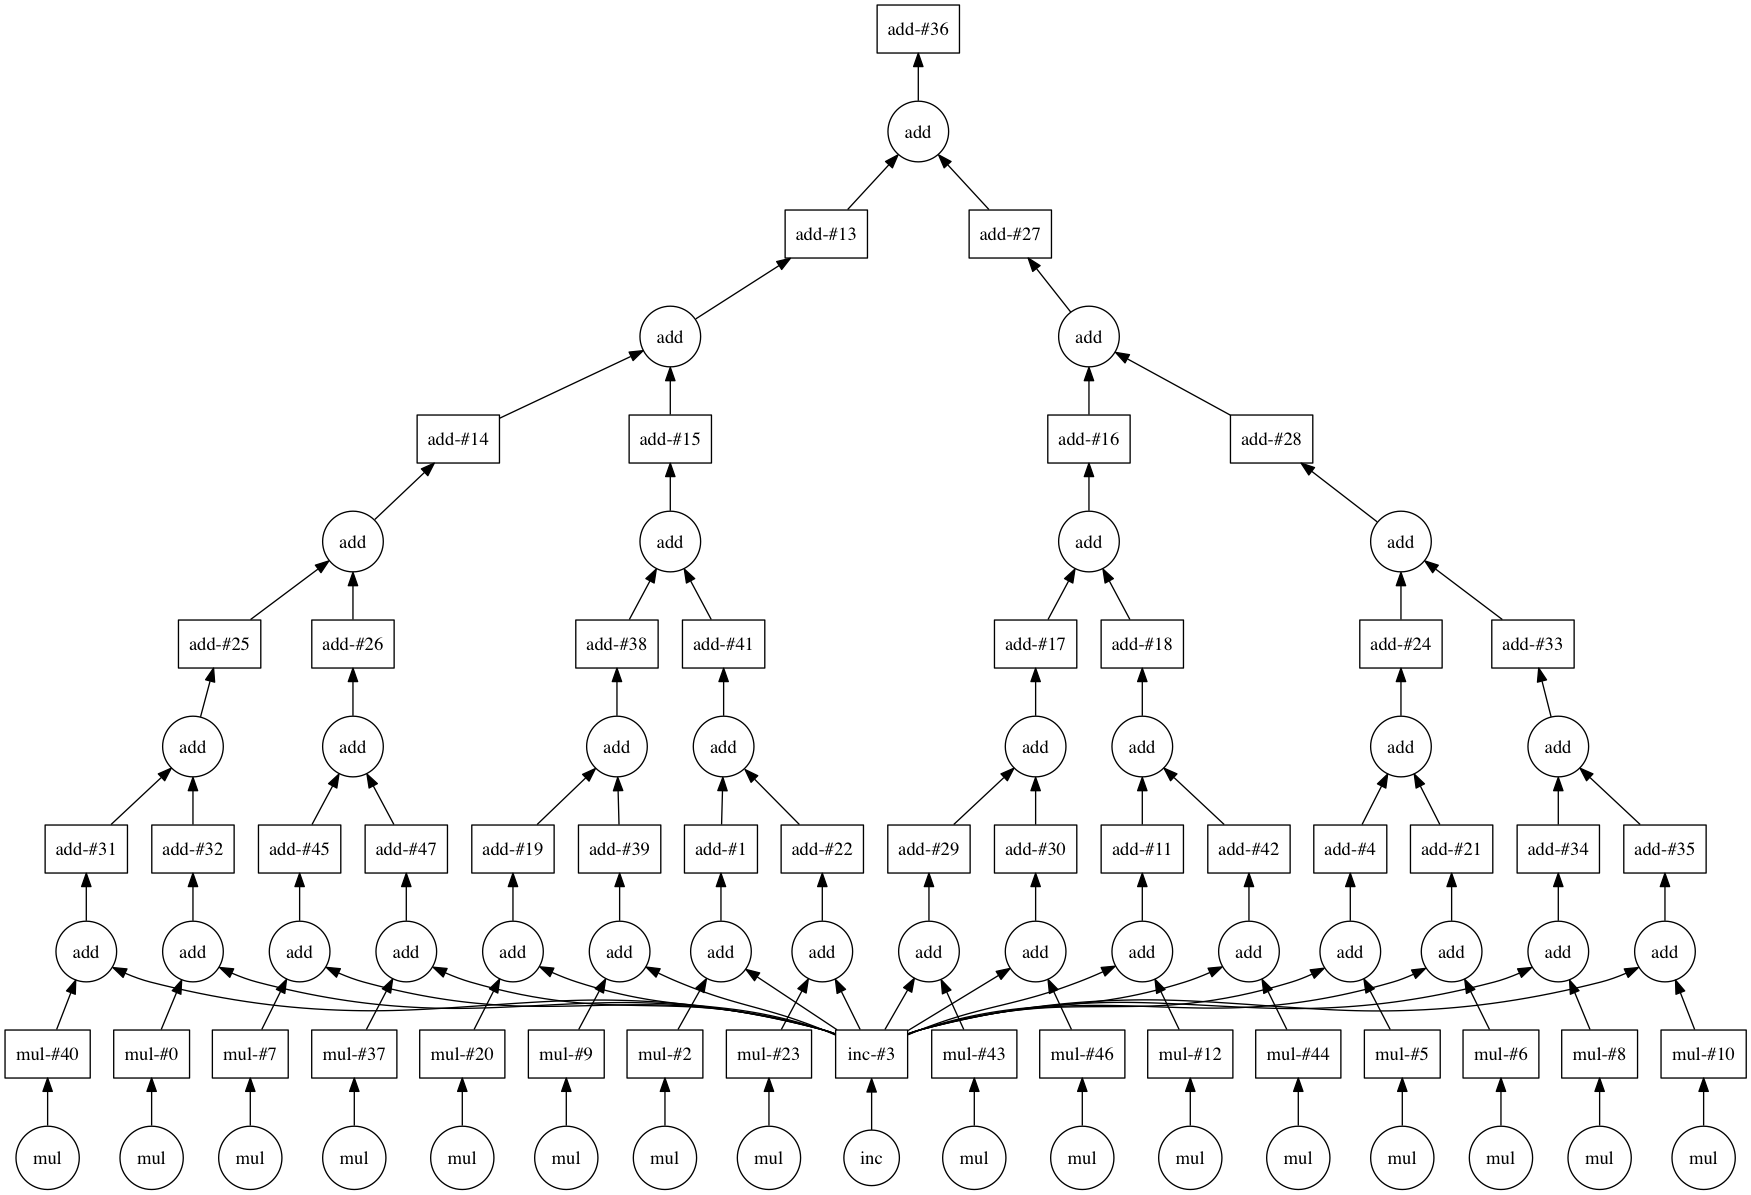

In [35]:
# Tree reduction --- add up pairwise
while len(results) > 1:
    new_results = []
    
    for i in range(0,len(results),2):
        res = add(results[i], results[i+1])
        new_results.append(res)
    
    results = new_results

total = results[0]
total.visualize()

In [36]:
total.compute()

152

Note: you cannot iterate over a delayed object and you can't use them in case statements (because we dont know how long they are until they've been computed)

In [37]:
for x in range(inc(1)):
    print("hey!")

TypeError: 'Delayed' object cannot be interpreted as an integer

## scheduling the execution

where you run a certain piece of a parallel task depends on your architecture, what needs each piece has, and what the bottlenecks are in moving data between pieces.

The **single machine scheduler** is optimizes for larger-than-memory use. It uses:
  
   - Parallel CPU
   - Minimizes RAM: tries to remove intermediary tasks that aren't needed anymore
   - low overhead: 100$\mu$s per task
 

**Distributed scheduler** - tries to minimize data movement so you dont have to move data between computers unnecessarily.
 
 - distributed to schedule across many workers
 - works well with distributed datastores (HDFS)
 - asynchronous
 - data local
 
run `dask-scheduler` on the command line and then 

In [38]:
from dask.distributed import Executor, progress
e = Executor(set_as_default=True)
e

ImportError: No module named 'hdfs3'

# swap out concurrent.futures with a dask executor.

In [39]:
%%time 
from time import sleep

#from concurrent.futures import ProcessPoolExecutor
#e = ProcessPoolExecutor() 

def slowfunc(x,y,delay=1):
    sleep(delay)
    return(x+y)

CPU times: user 15 µs, sys: 7 µs, total: 22 µs
Wall time: 26.9 µs


In [40]:
%%time
futures = [e.submit(slowfunc,1,2, delay=1) for _ in range(100)]
[f.result() for f in futures]

NameError: name 'e' is not defined

There are loads of ways to do mapping now in Python, [this notebook](https://github.com/mrocklin/scipy-2016-parallel/blob/master/notebooks/map-rosetta-stone.ipynb) is the Rosetta stone.

In [41]:
e.shutdown

NameError: name 'e' is not defined